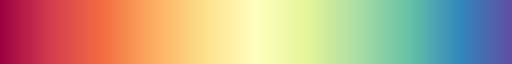

In [520]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette("Spectral", as_cmap=True)

In [521]:
# Load and preprocess data
books_path = "BX-Books.csv"
ratings_path = "BX-Book-Ratings.csv"

df_books = pd.read_csv(
    books_path,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['isbn', 'title', 'author'],
    usecols=['isbn', 'title', 'author'],
    dtype={'isbn': 'str', 'title': 'str', 'author': 'str'})

df_ratings = pd.read_csv(
    ratings_path,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['user', 'isbn', 'rating'],
    usecols=['user', 'isbn', 'rating'],
    dtype={'user': 'int32', 'isbn': 'str', 'rating': 'float32'})

In [522]:
df_list = [df_books,df_ratings]
def dataset_shapes(df_list):
    for df in df_list:
        print(f"have:{df.shape[0]} rows and {df.shape[1]} columns")
dataset_shapes(df_list)

have:271379 rows and 3 columns
have:1149780 rows and 3 columns


### Books dataset exploration


In [523]:
df_books.head()

,isbn,title,author
0,0195153448,Classical Mythology,Mark P. O. Morford
1,0002005018,Clara Callan,Richard Bruce Wright
2,0060973129,Decision in Normandy,Carlo D'Este
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata
4,0393045218,The Mummies of Urumchi,E. J. W. Barber


In [524]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   isbn    271379 non-null  object
 1   title   271379 non-null  object
 2   author  271378 non-null  object
dtypes: object(3)
memory usage: 6.2+ MB


In [525]:
# get top 20 authors

df_books.author.value_counts().nlargest(20)



Agatha Christie          632
William Shakespeare      567
Stephen King             524
Ann M. Martin            423
Carolyn Keene            373
Francine Pascal          372
Isaac Asimov             330
Nora Roberts             315
Barbara Cartland         307
Charles Dickens          302
Not Applicable (Na )     286
R. L. Stine              282
Mark Twain               231
Jane Austen              223
Terry Pratchett          220
Mary Higgins Clark       218
Piers Anthony            217
Marion Zimmer Bradley    216
Janet Dailey             214
Franklin W. Dixon        204
Name: author, dtype: int64

f:\#My Python\Django Projects\My Projects\BookRecommender\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Authors')

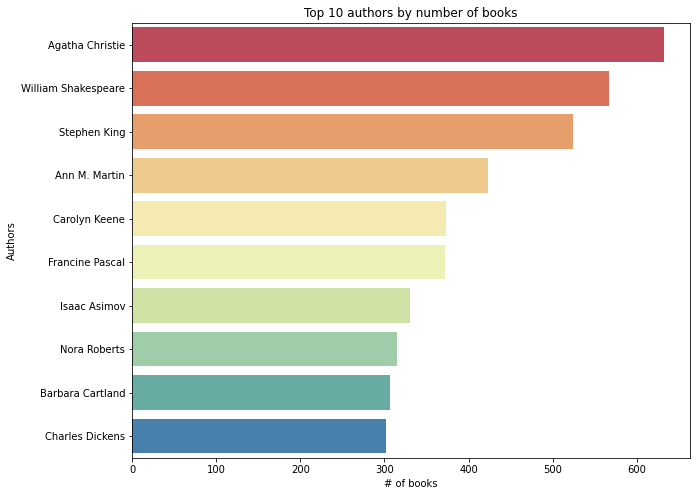

In [526]:
best_authors = df_books.groupby('author')['title'].count().reset_index().sort_values("title",ascending=False).set_index("author").head(10)
plt.figure(figsize=(10,8))
bar_chart = sns.barplot(best_authors.title,best_authors.index, palette="Spectral" )
bar_chart.set_title("Top 10 authors by number of books")
bar_chart.set_xlabel("# of books")
bar_chart.set_ylabel("Authors")




In [527]:
df_books.shape

(271379, 3)

### Rating Dataset exploration

In [528]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   user    1149780 non-null  int32  
 1   isbn    1149780 non-null  object 
 2   rating  1149780 non-null  float32
dtypes: float32(1), int32(1), object(1)
memory usage: 17.5+ MB


In [529]:
df_ratings.head(10)

,user,isbn,rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0
5,276733,2080674722,0.0
6,276736,3257224281,8.0
7,276737,0600570967,6.0
8,276744,038550120X,7.0
9,276745,342310538,10.0


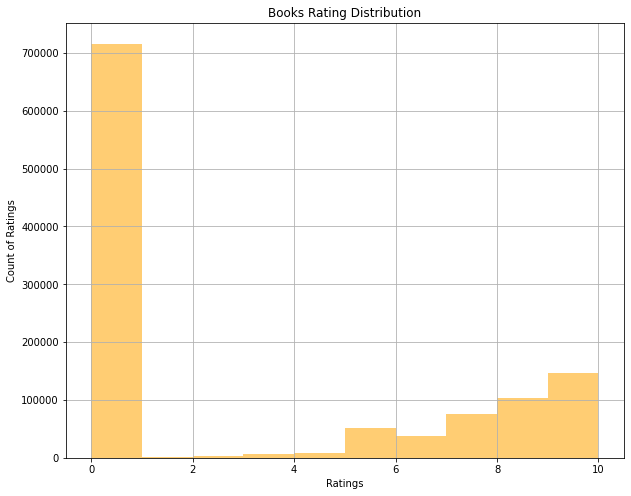

In [530]:
#plot distribution of ratings
plt.figure(figsize=(10,8))
plt.hist(df_ratings["rating"], color="orange", alpha=0.55)
plt.grid(True)
plt.xlabel("Ratings")
plt.ylabel("Count of Ratings")
plt.title("Books Rating Distribution")
plt.show()

In [531]:
ratings_dist = df_ratings["rating"].value_counts()
ratings_dist

0.0     716109
8.0     103736
10.0     78610
7.0      76457
9.0      67541
5.0      50974
6.0      36924
4.0       8904
3.0       5996
2.0       2759
1.0       1770
Name: rating, dtype: int64

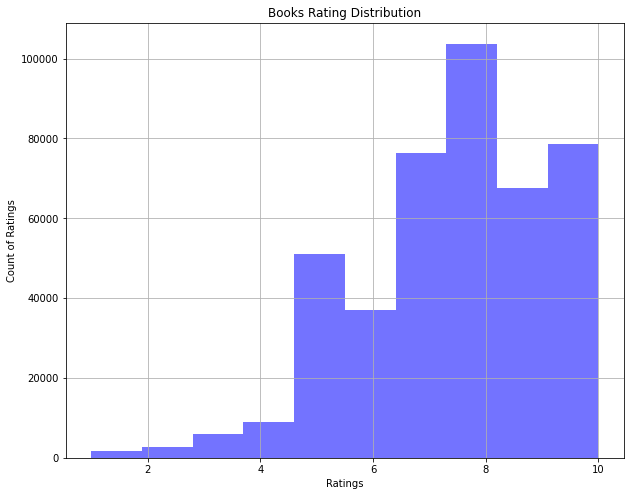

In [532]:
# get user records only with rating >0
df_cleaned_ratings = df_ratings[df_ratings.rating != 0]
plt.figure(figsize=(10,8))
plt.hist(df_cleaned_ratings["rating"],color="blue", alpha=0.55)
plt.grid(True)
plt.xlabel("Ratings")
plt.ylabel("Count of Ratings")
plt.title("Books Rating Distribution")
plt.show()

In [533]:
# get the number of ratings of every user
df_cleaned_ratings["user"].value_counts()

11676     8524
98391     5802
153662    1969
189835    1906
23902     1395
          ... 
114079       1
114081       1
114096       1
114115       1
276723       1
Name: user, Length: 77805, dtype: int64

In [534]:
#select users which gives more than x ratings
rating_treshold = 30
# mask
valid_users = df_cleaned_ratings["user"].value_counts() >= rating_treshold
#create index for DataFrame from valid users
user_index = valid_users[valid_users].index
user_index.shape
# Construct dataset with valid users which gives more than 100 ratings
df_cleaned_ratings = df_cleaned_ratings[df_cleaned_ratings["user"].isin(user_index)] 
df_cleaned_ratings.shape

(216116, 3)

In [535]:
# check if its correct
df_cleaned_ratings["user"].value_counts()

11676     8524
98391     5802
153662    1969
189835    1906
23902     1395
          ... 
11718       30
72523       30
171818      30
106173      30
88122       30
Name: user, Length: 2413, dtype: int64

### Merge Ratings and Books data

In [536]:
clean_dataset = df_cleaned_ratings.merge(df_books, on="isbn")
clean_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195625 entries, 0 to 195624
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   user    195625 non-null  int32  
 1   isbn    195625 non-null  object 
 2   rating  195625 non-null  float32
 3   title   195625 non-null  object 
 4   author  195624 non-null  object 
dtypes: float32(1), int32(1), object(3)
memory usage: 7.5+ MB


In [537]:
clean_dataset.describe()

,user,rating
count,195625.000000,195625.000000
mean,133226.664930,7.785206
std,80371.542785,1.811781
min,183.000000,1.000000
25%,66574.000000,7.000000
50%,128835.000000,8.000000
75%,203280.000000,9.000000
max,278633.000000,10.000000


In [538]:
clean_dataset.head(20)

,user,isbn,rating,title,author
0,276847,3404145909,8.0,Der Stein der Kelten.,Michael Phillips
1,276847,3404148576,8.0,Nordermoor,Arnaldur Indridason
2,30810,3404148576,9.0,Nordermoor,Arnaldur Indridason
3,132500,3404148576,6.0,Nordermoor,Arnaldur Indridason
4,276847,3404921178,7.0,Nur der Tod ist ohne Makel.,Ann Granger
5,11676,3404921178,8.0,Nur der Tod ist ohne Makel.,Ann Granger
6,140863,3404921178,6.0,Nur der Tod ist ohne Makel.,Ann Granger
7,276847,3423071516,10.0,Der Kleine Hobbit,J. R. R. Tolkien
8,276847,3426671298,8.0,Das geheime ABC der Toten.,Patricia Cornwell
9,276847,344215121X,9.0,Hitlers Kinder.,Guido Knopp


In [539]:
#get rating counts for every title from all valid users and reset index
count_rating = clean_dataset.groupby('title')['rating'].count().reset_index()
count_rating.rename(columns={"rating":"rating_counts"}, inplace=True)
print(count_rating)

                                                   title  rating_counts
0       A Light in the Storm: The Civil War Diary of ...              1
1       Ask Lily (Young Women of Faith: Lily Series, ...              1
2                                           Dark Justice              1
3       Earth Prayers From around the World: 365 Pray...              5
4       Final Fantasy Anthology: Official Strategy Gu...              2
...                                                  ...            ...
93563          Ã?Â?ber den ProzeÃ?Â? der Zivilisation 2.              1
93564                              Ã?Â?ber die Freiheit.              1
93565  Ã?Â?berallnie. AusgewÃ?Â¤hlte Gedichte 1928 - ...              1
93566                     Ã?Â?rger mit Produkt X. Roman.              2
93567                                  Ã?Â?thique en toc              1

[93568 rows x 2 columns]


### Lookup for most rated books in dataset

f:\#My Python\Django Projects\My Projects\BookRecommender\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Books')

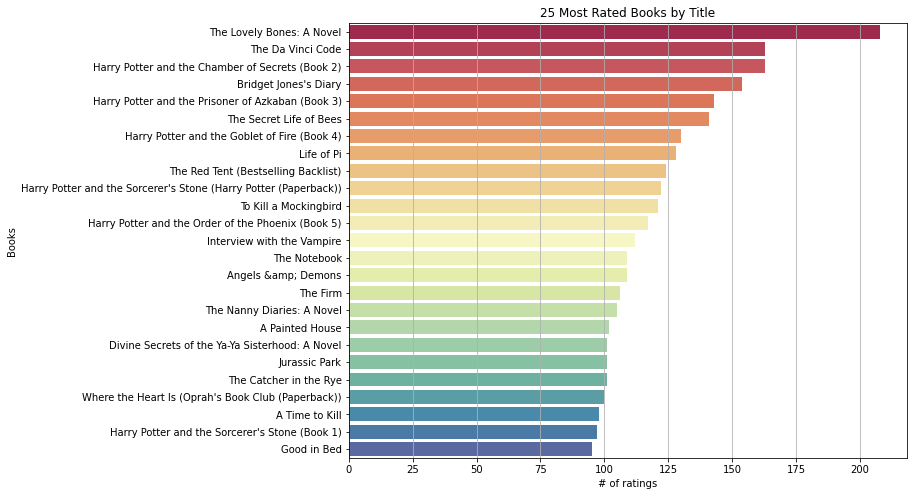

In [540]:
#get rating counts for every title from all valid users and reset index
most_rated = clean_dataset.groupby('title')['rating'].count().reset_index().sort_values("rating",ascending=False).set_index("title").head(25)
most_rated.rename(columns={"rating":"rating_counts"}, inplace=True)

plt.figure(figsize=(10,8))
plt.grid(True)
bar_chart = sns.barplot(most_rated.rating_counts,most_rated.index, palette="Spectral" )
bar_chart.set_title("25 Most Rated Books by Title")
bar_chart.set_xlabel("# of ratings")
bar_chart.set_ylabel("Books")

### Create finanl dataset for recommending engine

In [541]:
#mask_2 = count_rating["rating_counts"] >= 10
#new_df = count_rating[mask_2].reset_index()



In [562]:
# get DataFrame with rating counts for every Book
final_dataset = count_rating.merge(clean_dataset, on="title")
# get books with more than x rating counts
mask_ratings = final_dataset["rating_counts"] > 10
final_dataset[mask_ratings].tail()
final_dataset.shape

(195625, 6)

In [560]:
final_dataset = final_dataset[mask_ratings]
final_dataset.reset_index(inplace=True, drop=True)


In [662]:
final_dataset

,title,rating_counts,user,isbn,rating,author
0,A Light in the Storm: The Civil War Diary of ...,1,96448,0590567330,9.0,Karen Hesse
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1,269557,0310232546,8.0,Nancy N. Rue
2,Dark Justice,1,98391,0399151788,10.0,Jack Higgins
3,Earth Prayers From around the World: 365 Pray...,5,26544,006250746X,9.0,Elizabeth Roberts
4,Earth Prayers From around the World: 365 Pray...,5,179730,006250746X,1.0,Elizabeth Roberts
...,...,...,...,...,...,...
195620,Ã?Â?ber die Freiheit.,1,12835,3150034914,7.0,John Stuart Mill
195621,Ã?Â?berallnie. AusgewÃ?Â¤hlte Gedichte 1928 - ...,1,263733,3423120150,10.0,Marie Luise Kaschnitz
195622,Ã?Â?rger mit Produkt X. Roman.,2,35407,325721538X,6.0,Joan Aiken
195623,Ã?Â?rger mit Produkt X. Roman.,2,133567,325721538X,8.0,Joan Aiken


In [564]:
# drop duplicate rating by same user
final_dataset.drop_duplicates(["user","title"], inplace=True)
final_dataset.shape

(194683, 6)

In [565]:
final_dataset.describe()

,rating_counts,user,rating
count,194683.000000,194683.000000,194683.000000
mean,10.978925,133390.439443,7.784429
std,21.325202,80327.269239,1.811066
min,1.000000,183.000000,1.000000
25%,1.000000,66942.000000,7.000000
50%,3.000000,128835.000000,8.000000
75%,10.000000,203603.000000,9.000000
max,208.000000,278633.000000,10.000000


In [566]:
pivot = final_dataset.pivot_table(index="title",columns="user",values="rating")
pivot.shape

(93568, 2412)

In [656]:
like_book = ' Dark Justice'
#pivot.loc[like_book].values
#pivot.index[0]
def get_index_by_title(like_book, df):
    book_titles = df.index.tolist()
    row_index = book_titles.index(like_book)
    return row_index


In [661]:
like_book = "Where the Heart Is (Oprah's Book Club (Paperback))"
pivot.iloc[get_index_by_title(like_book, pivot)]

user
183       0.0
242       0.0
254       0.0
507       0.0
638       0.0
         ... 
278188    0.0
278356    0.0
278418    0.0
278582    0.0
278633    0.0
Name: Where the Heart Is (Oprah's Book Club (Paperback)), Length: 2412, dtype: float32

user
183       0.0
242       0.0
254       0.0
507       0.0
638       0.0
         ... 
278188    0.0
278356    0.0
278418    0.0
278582    0.0
278633    0.0
Name: The Queen of the Damned (Vampire Chronicles (Paperback)), Length: 2412, dtype: float32

In [567]:
pivot.fillna(0,inplace=True)
pivot.shape

(93568, 2412)

In [568]:
from scipy.sparse import csr_matrix
book_sparse = csr_matrix(pivot)

In [569]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(metric = 'cosine', algorithm='auto',n_neighbors=5)
model.fit(book_sparse)

NearestNeighbors(metric='cosine')

In [582]:
distances, suggestions = model.kneighbors(pivot.iloc[1, :].values.reshape(1, -1))

In [583]:
for i in range(len(suggestions)):
  print(pivot.index[suggestions[i]])

Index(['Stranger Online (Todaysgirlsonly, 1)',
       'Scholastic Book of World Records 2004 (Scholastic Book of World Records)',
       'New York Ninjas (American Chillers)',
       'Professor Terwilliger and Tim Neptune I',
       'The Feelings Book: The Care &amp; Keeping of Your Emotions (American Girl (Paperback Unnumbered))'],
      dtype='object', name='title')
